In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import exponential as exp
%matplotlib notebook

In [2]:
# Parameters
I_0 = 5
S_0 = 5
N = 10
Ris = 2

In [3]:
def getQMatrix(Rsi):
    """ Create Q matrix for SI model with fixed Rsi value"""
    Q = np.zeros((N + 1, N + 1))
    for i in range(N):
        Q[i, i + 1] = Ris * (N - i) # infective becomes a susceptible again
        if i != 0:
            Q[i, i - 1] = Rsi * i * (N - i) # susceptible becomes an infective
        Q[i, i] = - np.sum(Q[i, :])
    return Q

print(getQMatrix(2))

[[-20.  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 18. -36.  18.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  32. -48.  16.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  42. -56.  14.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  48. -60.  12.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  50. -60.  10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  48. -56.   8.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  42. -48.   6.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  32. -36.   4.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  18. -20.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [4]:
# Run simulation for a range of Rsi values initially
Rs = np.linspace(0, 1, num=40)
probs = []
trials = int(5000)

for Rsi in Rs:
    # Get Q matrix
    Q = getQMatrix(Rsi)
    diagonal = (- np.diag(Q))
    jumpUp = [Q[i, i + 1]/(-Q[i, i]) for i in range(N)]    
    # Get probability matrix
    Pjump = Q / diagonal[:, np.newaxis]
    np.fill_diagonal(Pjump, 0)
    np.nan_to_num(Pjump, copy=False)
    event = 0
    for trial in range(trials):
        time = 0
        state = S_0
        # print(state)
        while state != N:
            time += exp(scale=1/diagonal[state])
            val = np.random.rand()
            if val <= jumpUp[state]:
                state += 1
            else:
                state -= 1
        if time > 15:
            event += 1
    probs.append(event/trials)

print(event)

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


4849


<IPython.core.display.Javascript object>


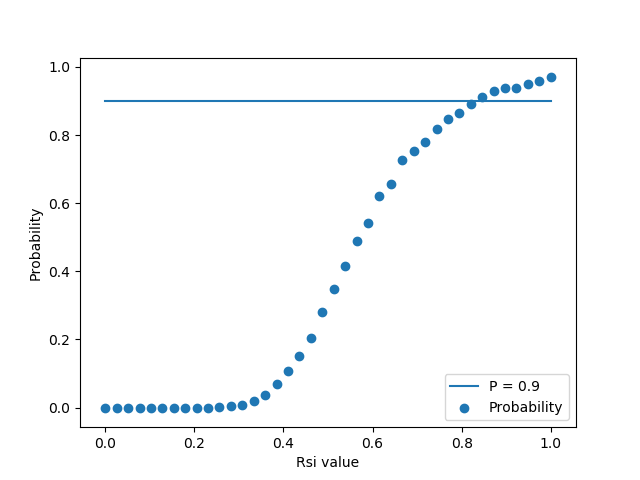

In [12]:
# Create plot and observe which values give probability close to 0.9
plt.figure()
plt.scatter(Rs, probs, label="Probability")
plt.plot(Rs, np.ones(len(probs)) * 0.9, label="P = {}".format(0.9))
plt.xlabel("Rsi value")
plt.ylabel("Probability")
plt.legend()
plt.savefig("images\\q4_a")

In [6]:
# After finding that Rsi values close to 0.8 give probability close to 0.9
# choose Rsi values in the proximity of 0.8 and run a larger number of trials
trials = int(10000)

finer = []
finerRsi = [0.8, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.832, 0.835, 0.84]

for Rsi in finerRsi:
    print(Rsi)
    # Get Q matrix
    Q = getQMatrix(Rsi)
    diagonal = (- np.diag(Q))
    jumpUp = [Q[i, i + 1]/(-Q[i, i]) for i in range(N)]    
    # Get probability matrix
    Pjump = Q / diagonal[:, np.newaxis]
    np.fill_diagonal(Pjump, 0)
    np.nan_to_num(Pjump, copy=False)
    
    event = 0
    for trial in range(trials):
        # print(trial)
        time = 0
        state = S_0
        # print(state)
        while state != N:
            time += exp(scale=1/diagonal[state])
            val = np.random.rand()
            if val <= jumpUp[state]:
                state += 1
            else:
                state -= 1
            # state = np.random.choice(range(0, N + 1), p=Pjump[state, :])
            # print(state)
        if time > 15:
            event += 1
    finer.append(event/trials)


0.8


C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


0.805
0.81
0.815
0.82
0.825
0.83
0.832
0.835
0.84


<IPython.core.display.Javascript object>


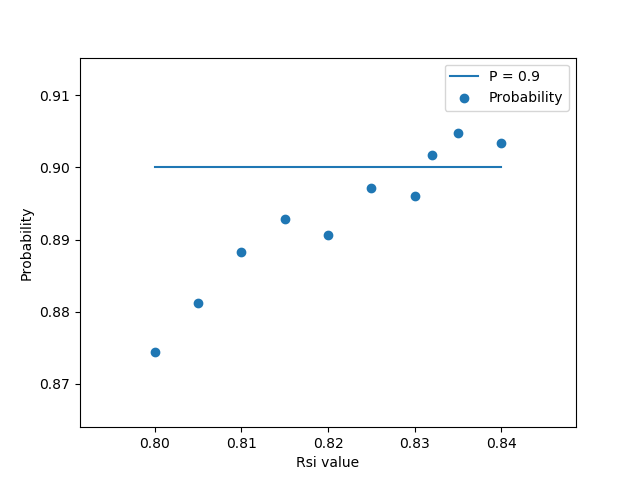

In [13]:
# Plot probability values
plt.figure()
plt.scatter(finerRsi, finer, label="Probability")
plt.plot(finerRsi, np.ones(len(finerRsi)) * 0.9, label="P = {}".format(0.9))
plt.xlabel("Rsi value")
plt.ylabel("Probability")
plt.legend()
plt.savefig("images\\q4_a_ii")

In [14]:
finer

[0.8744, 0.8812, 0.8883, 0.8928, 0.8906, 0.8971, 0.896, 0.9017, 0.9048, 0.9034]